### Problema 1 
O arquivo manchas_solares.dat que contém o número mensal de manchas solares observadas entre 1940 e 2021, sendo a primeira coluna o ano, a segunda o mês, a terceira a fração do ano e quarta o número de manchas solares, respectivamente.

a) Utilizando a terceira e quarta coluna do arquivo, faça um gráfico do número de manchas solares observadas entre 1940 e 2021. Use numpy.loadtxt() para ler o arquivo. Não esqueça de incluir a descrição dos eixos do gráfico.

Text(0, 0.5, 'Manchas solares')

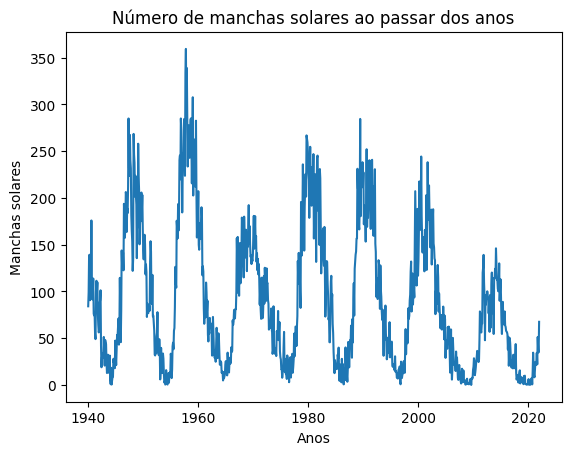

In [1]:
import numpy as np
import matplotlib.pyplot as plt

txt = np.loadtxt("manchas_solares.txt")
txt_filtrado = txt[txt[:, 2] >= 1940]
tempo = txt_filtrado[:, 2]
manchas = txt_filtrado[:, 3]

plt.plot(tempo, manchas)
plt.title("Número de manchas solares ao passar dos anos")
plt.xlabel("Anos")
plt.ylabel("Manchas solares")

b) Usando numpy.fft.rfft, calcule a transformada de Fourier dos dados usados no item (a). Faça o gráfico do quadrado do módulo dos coeficientes de Fourier, $ \mid C_k \mid $, em função do período T. O período pode ser determinado a partir da frequência calculada pela função np.fft.rfftfreq(N, 1), onde N é o tamanho do seu conjunto de dados. Para evitar divisão por zero, exclua o seu primeiro valor da frequência. Para melhor visualização, limite o eixo x do seu gráfico ao intervalo [0, 400].


(0.0, 400.0)

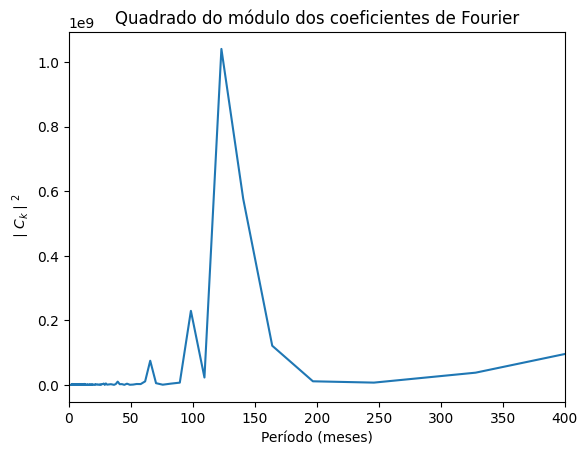

In [2]:
transformada = np.fft.rfft(manchas)
transformada = np.power(np.absolute(transformada[1:]), 2)
frequencia = np.fft.rfftfreq(len(tempo), 1)
periodo = 1 / frequencia[1:]

plt.plot(periodo, transformada)
plt.title("Quadrado do módulo dos coeficientes de Fourier")
plt.xlabel("Período (meses)")
plt.ylabel(r"$\mid C_k\mid^2$")
plt.xlim([0, 400])

c) Encontre o valor do período T que corresponde ao pico do gráfico anterior, e determine esse período em anos. Essa variação periódica observada no número de manchas solares é conhecida como ciclo solar.


In [3]:
periodo_pico = periodo[np.argmax(transformada)]
periodo_pico_em_anos = periodo_pico / 12

print(f"Período correspondente ao pico: {periodo_pico:.2f} meses")
print(f"Período correspondente ao pico: {periodo_pico_em_anos:.2f} anos")

Período correspondente ao pico: 123.00 meses
Período correspondente ao pico: 10.25 anos


d) Com base nos seus resultados, estime quando (mês e ano) ocorrerá o próximo máximo solar, ou seja, quando o número de manchas voltará a ter um pico.

Próximo máximo solar estimado será no ano de 2024 e no mês de março.


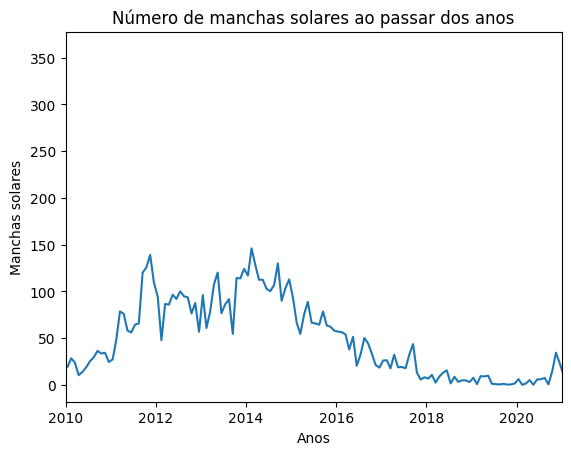

In [12]:
#Utilizarei do primeiro gráfico para fazer uma estimtiva de quando foi o último pico:
plt.plot(tempo, manchas)
plt.title("Número de manchas solares ao passar dos anos")
plt.xlabel("Anos")
plt.ylabel("Manchas solares")
plt.xlim([2010, 2021])
# E analisando o gráfico é possível ver que o último pico estava entre 2012 e 2014, 
# utilizarei 2014 como o ano do último pico de manchas solares.

proximo_maximo_solar = 2014 + periodo_pico_em_anos
print(f"Próximo máximo solar estimado será no ano de {proximo_maximo_solar:.0f} e no mês de março.")

### Problema 2

Em 1929, o astrônomo Edwin Hubble publicou um trabalho revolucionário: estimando a distância de várias galáxias e a velocidade com que elas se afastavam, Hubble observou uma relação linear entre essas duas grandezas, resultado que ficou conhecido como lei de Hubble:

$$ v = H_0 d $$

onde v é a velocidade de recessão da galáxia, d é a distância da galáxia e $H_0$ é a constante de Hubble, que representa a taxa com a qual o universo está se expandindo.
O arquivo dados_galaxias.dat contém dados de distância e veloidade de recessão de várias galáxias, com a distância na primeira coluna dada em Mpc (megaparsec), e a velocidade na segunda coluna, em km/s. Note que 1 Mpc = $10^6$ parsec, e 1 parsec = 3.086 x $10^{13}$ km.

a) Utilizando o método curve_fit do SciPy, faça um ajuste de uma reta (y = ax + b) aos dados do arquivo (considere a velocidade no eixo y e a distância no eixo x). Depois, faça um gráfico mostrando os dados e a reta ajustada. Utilize pontos para os dados e linha cheia para a reta ajustada. Não esqueça de incluir a descrição dos eixos, com suas respectivas unidades.

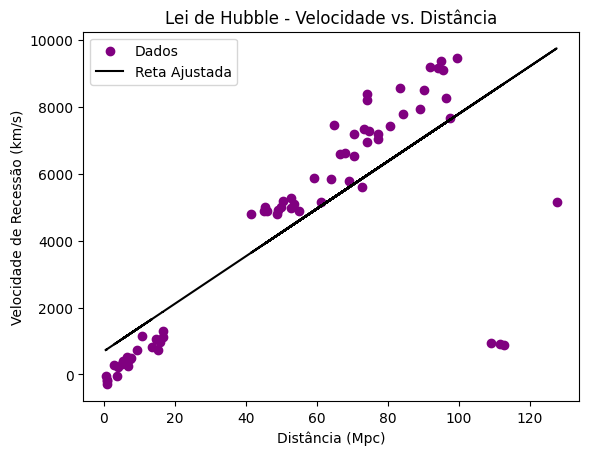

In [5]:
from scipy.optimize import curve_fit 

dados = np.loadtxt("dados_galaxias.dat")
distancia = dados[:, 0] # Mpc
velocidade = dados[:, 1]  # km/s

reta = lambda x, a, b : a * x + b

[a, b], _ = curve_fit(reta, distancia, velocidade)
y = reta(distancia, a, b)

plt.scatter(distancia, velocidade, color = "purple", label = "Dados")
plt.plot(distancia, y, color = "black", label = f'Reta Ajustada')
plt.title("Lei de Hubble - Velocidade vs. Distância")
plt.xlabel("Distância (Mpc)")
plt.ylabel("Velocidade de Recessão (km/s)")
plt.legend()

b) Determine o valor de $H_0$ em $s^{-1}$ (inverso de segundo).

In [6]:
H0 = a / 3.086e19

print(f"Constante de Hubble em s^(-1): {H0:.4e} s^(-1)")

Constante de Hubble em s^(-1): 2.2989e-18 s^(-1)


c) A idade do universo pode ser estimada como $ t = 1 / H_0 $. Com o valor $H_0$ que você obteve, estime a idade do universo em bilhões de anos.

In [7]:
idade_do_universo_segundos = 1 / H0
idade_do_universo_bilhoes_de_anos = idade_do_universo_segundos * 3.1689E-17 

print(f"A idade do universo em bilhões de anos é: {idade_do_universo_bilhoes_de_anos}")

A idade do universo em bilhões de anos é: 13.784508790014632
